In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing as sk

In [42]:
dev_indic = pd.read_excel('C://Users//paulo//Documents//Econometrics and ML//Final Project//Development_Indicators.xlsx')
dev_indic

,Country Name,Country Code,Indicator Name,1960,1961,1962,1963,1964,1965,1966,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Arab World,ARB,CO2 emissions (metric tons per capita),0.607448,0.660638,0.724944,0.850567,0.969476,1.135271,1.248257,...,4.572407,4.956928,4.801390,4.981330,4.933420,4.712845,NaN,NaN,NaN,NaN
1,Caribbean small states,CSS,CO2 emissions (metric tons per capita),1.401336,2.059977,2.703740,1.350237,2.362951,2.601917,2.529152,...,9.104864,8.871631,9.160637,8.881435,8.760031,8.490807,NaN,NaN,NaN,NaN
2,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),5.104206,5.330535,5.658550,6.064745,6.454644,6.604577,6.764899,...,6.882900,6.529346,6.371816,6.128368,6.236443,6.377623,NaN,NaN,NaN,NaN
3,Early-demographic dividend,EAR,CO2 emissions (metric tons per capita),0.603548,0.614967,0.634832,0.652360,0.678168,0.709218,0.727492,...,2.174205,2.260198,2.187685,2.273706,2.341184,2.345693,NaN,NaN,NaN,NaN
4,East Asia & Pacific,EAS,CO2 emissions (metric tons per capita),1.167559,1.007285,0.911662,0.931717,0.960412,1.021589,1.075297,...,6.134880,6.255061,6.290310,6.232051,6.187777,6.071789,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14779,Zimbabwe,ZWE,Population growth (annual %),NaN,3.342091,3.378041,3.395952,3.391104,3.373423,3.346808,...,1.536391,1.698001,1.777645,1.754692,1.663813,1.549759,1.460061,1.410783,1.419681,NaN
14780,Zimbabwe,ZWE,Population in the largest city (% of urban pop...,52.078276,52.071849,51.873552,50.792669,49.743096,48.735326,47.772670,...,34.755434,34.475348,34.169965,33.844820,33.521843,33.209409,32.899038,32.576344,32.249579,NaN
14781,Zimbabwe,ZWE,Rural population (% of total population),87.392000,87.179000,86.918000,86.422000,85.908000,85.380000,84.835000,...,66.985000,67.166000,67.346000,67.496000,67.615000,67.704000,67.763000,67.791000,67.790000,NaN
14782,Zimbabwe,ZWE,Tax revenue (% of GDP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.928254,17.835489,NaN,NaN,17.673363,15.458341,15.874375,20.658688,NaN,NaN


In [51]:
transposed_dev_indic = dev_indic.melt(id_vars=['Country Name','Country Code','Indicator Name'], var_name="Year", value_name="Value")
transposed_dev_indic = transposed_dev_indic.groupby(['Country Name','Country Code','Indicator Name','Year']).mean()
transposed_dev_indic = transposed_dev_indic.unstack('Indicator Name').reset_index()
fixed_output = transposed_dev_indic['Value']
fixed_output[['Country Name','Country Code','Year']] = transposed_dev_indic[['Country Name','Country Code','Year']]
fixed_output

C:\Users\paulo\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Indicator Name,Age dependency ratio (% of working-age population),CO2 emissions (metric tons per capita),Employment in agriculture (% of total employment) (modeled ILO estimate),Energy use (kg of oil equivalent per capita),"Fertility rate, total (births per woman)","Foreign direct investment, net (BoP, current US$)",GDP growth (annual %),GDP per capita (constant 2010 US$),Gini index (World Bank estimate),Human capital index (HCI) (scale 0-1),...,"Population ages 80 and above, male (% of male population)",Population density (people per sq. km of land area),Population growth (annual %),Population in the largest city (% of urban population),Rural population (% of total population),Tax revenue (% of GDP),Trade (% of GDP),Country Name,Country Code,Year
0,81.617277,0.046057,NaN,NaN,7.450,NaN,NaN,NaN,NaN,NaN,...,0.178382,NaN,NaN,37.753163,91.599,NaN,11.157027,Afghanistan,AFG,1960
1,82.688685,0.053589,NaN,NaN,7.450,NaN,NaN,NaN,NaN,NaN,...,0.196248,14.044987,1.898476,37.720653,91.316,NaN,12.550610,Afghanistan,AFG,1961
2,83.289387,0.073721,NaN,NaN,7.450,NaN,NaN,NaN,NaN,NaN,...,0.207909,14.323808,1.965751,37.667697,91.024,NaN,14.227644,Afghanistan,AFG,1962
3,83.604065,0.074161,NaN,NaN,7.450,NaN,NaN,NaN,NaN,NaN,...,0.211452,14.617537,2.029893,37.598110,90.724,NaN,26.035511,Afghanistan,AFG,1963
4,83.853837,0.086174,NaN,NaN,7.450,NaN,NaN,NaN,NaN,NaN,...,0.205247,14.926295,2.090248,37.508711,90.414,NaN,26.944448,Afghanistan,AFG,1964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16099,83.576737,0.782777,67.066002,NaN,3.804,-3.430138e+08,0.755869,1224.309922,NaN,NaN,...,0.228447,36.268295,1.549759,33.209409,67.704,15.458341,51.219025,Zimbabwe,ZWE,2016
16100,83.466235,NaN,66.764999,NaN,3.707,-2.471877e+08,4.704035,1263.321322,44.3,0.441,...,0.238924,36.801719,1.460061,32.899038,67.763,15.874375,50.028296,Zimbabwe,ZWE,2017
16101,82.951116,NaN,66.306999,NaN,3.615,NaN,4.829674,1305.783295,NaN,NaN,...,0.244973,37.324591,1.410783,32.576344,67.791,20.658688,50.005361,Zimbabwe,ZWE,2018
16102,82.277970,NaN,66.543999,NaN,NaN,NaN,-8.100000,1183.098823,NaN,NaN,...,0.246844,NaN,1.419681,32.249579,67.790,NaN,NaN,Zimbabwe,ZWE,2019


In [52]:
fixed_output.isna().sum()

Indicator Name
Age dependency ratio (% of working-age population)                           1775
CO2 emissions (metric tons per capita)                                       3126
Employment in agriculture (% of total employment) (modeled ILO estimate)     9114
Energy use (kg of oil equivalent per capita)                                 8217
Fertility rate, total (births per woman)                                     1842
Foreign direct investment, net (BoP, current US$)                            9393
GDP growth (annual %)                                                        4181
GDP per capita (constant 2010 US$)                                           4169
Gini index (World Bank estimate)                                            14455
Human capital index (HCI) (scale 0-1)                                       15947
Inflation, consumer prices (annual %)                                        6291
Intentional homicides (per 100,000 people)                                  12244
L

In [170]:
# Start of pop, country, and year vars:
my_vars = [v for v in fixed_output.columns if v.startswith('Population')]
my_vars = my_vars[:-3]
my_vars.append('Country Name')
my_vars.append('Year')
my_vars.append('CO2 emissions (metric tons per capita)')
my_vars

['Population ages 00-04, female (% of female population)',
 'Population ages 00-04, male (% of male population)',
 'Population ages 05-09, female (% of female population)',
 'Population ages 05-09, male (% of male population)',
 'Population ages 10-14, female (% of female population)',
 'Population ages 10-14, male (% of male population)',
 'Population ages 15-19, female (% of female population)',
 'Population ages 15-19, male (% of male population)',
 'Population ages 20-24, female (% of female population)',
 'Population ages 20-24, male (% of male population)',
 'Population ages 25-29, female (% of female population)',
 'Population ages 25-29, male (% of male population)',
 'Population ages 30-34, female (% of female population)',
 'Population ages 30-34, male (% of male population)',
 'Population ages 35-39, female (% of female population)',
 'Population ages 35-39, male (% of male population)',
 'Population ages 40-44, female (% of female population)',
 'Population ages 40-44, male

In [171]:
fixed_output.loc[:,my_vars].isna().sum()


Indicator Name
Population ages 00-04, female (% of female population)           1772
Population ages 00-04, male (% of male population)               1772
Population ages 05-09, female (% of female population)           1772
Population ages 05-09, male (% of male population)               1772
Population ages 10-14, female (% of female population)           1772
Population ages 10-14, male (% of male population)               1772
Population ages 15-19, female (% of female population)           1772
Population ages 15-19, male (% of male population)               1772
Population ages 20-24, female (% of female population)           1772
Population ages 20-24, male (% of male population)               1772
Population ages 25-29, female (% of female population)           1772
Population ages 25-29, male (% of male population)               1772
Population ages 30-34, female (% of female population)           1772
Population ages 30-34, male (% of male population)               1772
Popul

In [172]:
pop_and_co2 = fixed_output.loc[:,my_vars].dropna()
pop_and_co2 = pd.get_dummies(pop_and_co2)
pop_and_co2

,"Population ages 00-04, female (% of female population)","Population ages 00-04, male (% of male population)","Population ages 05-09, female (% of female population)","Population ages 05-09, male (% of male population)","Population ages 10-14, female (% of female population)","Population ages 10-14, male (% of male population)","Population ages 15-19, female (% of female population)","Population ages 15-19, male (% of male population)","Population ages 20-24, female (% of female population)","Population ages 20-24, male (% of male population)",...,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016
0,17.503290,16.785842,13.432254,12.876903,12.517706,11.250969,10.302080,10.282127,8.799340,8.946413,...,0,0,0,0,0,0,0,0,0,0
1,17.917325,17.087659,13.399371,13.050917,12.343878,11.181396,10.366971,10.181618,8.745807,8.920184,...,0,0,0,0,0,0,0,0,0,0
2,18.050876,17.258189,13.487632,13.237757,12.127265,11.171520,10.517922,10.080377,8.706987,8.913882,...,0,0,0,0,0,0,0,0,0,0
3,18.009133,17.358484,13.651376,13.401589,11.904029,11.217620,10.689945,9.986183,8.691679,8.912621,...,0,0,0,0,0,0,0,0,0,0
4,17.947615,17.449096,13.806396,13.514269,11.727171,11.297788,10.796585,9.915545,8.714555,8.899144,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16095,15.426680,17.196368,12.917696,14.232374,11.659677,12.766281,10.958052,11.551257,10.419869,10.090853,...,0,0,0,0,0,1,0,0,0,0
16096,15.579254,17.358413,13.056056,14.425486,11.572144,12.676311,10.767863,11.420976,10.094217,9.808920,...,0,0,0,0,0,0,1,0,0,0
16097,15.614957,17.389331,13.218466,14.647546,11.542159,12.655012,10.637489,11.360722,9.809557,9.593160,...,0,0,0,0,0,0,0,1,0,0
16098,15.510048,17.277963,13.373574,14.849885,11.582718,12.725472,10.559044,11.354623,9.597213,9.463343,...,0,0,0,0,0,0,0,0,1,0


In [173]:
X = pop_and_co2.loc[:,pop_and_co2.columns != 'CO2 emissions (metric tons per capita)'].values
y = pop_and_co2.loc[:, 'CO2 emissions (metric tons per capita)'].values

In [174]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [175]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [176]:
[np.abs(regressor.predict(X_test) - y_test).mean(), y_test.mean()]

[0.6648694628562068, 4.59652524097311]

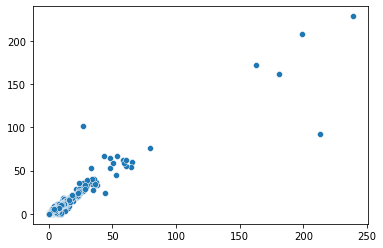

In [177]:
sns.scatterplot(x = regressor.predict(X_test), y = y_test)

In [178]:
# Start of just pop vars:
my_vars = [v for v in fixed_output.columns if v.startswith('Population')]
my_vars = my_vars[:-3]
my_vars.append('CO2 emissions (metric tons per capita)')
my_vars

['Population ages 00-04, female (% of female population)',
 'Population ages 00-04, male (% of male population)',
 'Population ages 05-09, female (% of female population)',
 'Population ages 05-09, male (% of male population)',
 'Population ages 10-14, female (% of female population)',
 'Population ages 10-14, male (% of male population)',
 'Population ages 15-19, female (% of female population)',
 'Population ages 15-19, male (% of male population)',
 'Population ages 20-24, female (% of female population)',
 'Population ages 20-24, male (% of male population)',
 'Population ages 25-29, female (% of female population)',
 'Population ages 25-29, male (% of male population)',
 'Population ages 30-34, female (% of female population)',
 'Population ages 30-34, male (% of male population)',
 'Population ages 35-39, female (% of female population)',
 'Population ages 35-39, male (% of male population)',
 'Population ages 40-44, female (% of female population)',
 'Population ages 40-44, male

In [179]:
pop_and_co2 = fixed_output.loc[:,my_vars].dropna()
pop_and_co2 = pd.get_dummies(pop_and_co2)
pop_and_co2

Indicator Name,"Population ages 00-04, female (% of female population)","Population ages 00-04, male (% of male population)","Population ages 05-09, female (% of female population)","Population ages 05-09, male (% of male population)","Population ages 10-14, female (% of female population)","Population ages 10-14, male (% of male population)","Population ages 15-19, female (% of female population)","Population ages 15-19, male (% of male population)","Population ages 20-24, female (% of female population)","Population ages 20-24, male (% of male population)",...,"Population ages 60-64, male (% of male population)","Population ages 65-69, female (% of female population)","Population ages 65-69, male (% of male population)","Population ages 70-74, female (% of female population)","Population ages 70-74, male (% of male population)","Population ages 75-79, female (% of female population)","Population ages 75-79, male (% of male population)","Population ages 80 and above, female (% of female population)","Population ages 80 and above, male (% of male population)",CO2 emissions (metric tons per capita)
0,17.503290,16.785842,13.432254,12.876903,12.517706,11.250969,10.302080,10.282127,8.799340,8.946413,...,2.001324,1.302481,1.447079,0.797144,0.876382,0.390809,0.423329,0.172195,0.178382,0.046057
1,17.917325,17.087659,13.399371,13.050917,12.343878,11.181396,10.366971,10.181618,8.745807,8.920184,...,1.973659,1.292881,1.423392,0.796615,0.877755,0.399851,0.433381,0.188279,0.196248,0.053589
2,18.050876,17.258189,13.487632,13.237757,12.127265,11.171520,10.517922,10.080377,8.706987,8.913882,...,1.954714,1.286019,1.395272,0.794970,0.875946,0.404904,0.437080,0.199343,0.207909,0.073721
3,18.009133,17.358484,13.651376,13.401589,11.904029,11.217620,10.689945,9.986183,8.691679,8.912621,...,1.939788,1.281208,1.366448,0.792831,0.870262,0.405917,0.434703,0.203961,0.211452,0.074161
4,17.947615,17.449096,13.806396,13.514269,11.727171,11.297788,10.796585,9.915545,8.714555,8.899144,...,1.922492,1.277415,1.341469,0.790062,0.859182,0.402782,0.427283,0.200632,0.205247,0.086174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16095,15.426680,17.196368,12.917696,14.232374,11.659677,12.766281,10.958052,11.551257,10.419869,10.090853,...,1.179499,1.298647,0.913303,1.063041,0.675439,0.706119,0.370529,0.645331,0.230413,0.600303
16096,15.579254,17.358413,13.056056,14.425486,11.572144,12.676311,10.767863,11.420976,10.094217,9.808920,...,1.228135,1.235567,0.867776,1.069123,0.683596,0.697428,0.371668,0.630810,0.230989,0.881705
16097,15.614957,17.389331,13.218466,14.647546,11.542159,12.655012,10.637489,11.360722,9.809557,9.593160,...,1.272370,1.199193,0.841404,1.065346,0.682269,0.693944,0.373194,0.606191,0.225452,0.891739
16098,15.510048,17.277963,13.373574,14.849885,11.582718,12.725472,10.559044,11.354623,9.597213,9.463343,...,1.305448,1.200147,0.841222,1.048557,0.669972,0.696729,0.376158,0.572616,0.213617,0.891624


In [180]:
X = pop_and_co2.loc[:,pop_and_co2.columns != 'CO2 emissions (metric tons per capita)'].values
y = pop_and_co2.loc[:, 'CO2 emissions (metric tons per capita)'].values

In [181]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [182]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [183]:
[np.abs(regressor.predict(X_test) - y_test).mean(), y_test.mean()]

[1.5882474655625196, 4.59652524097311]

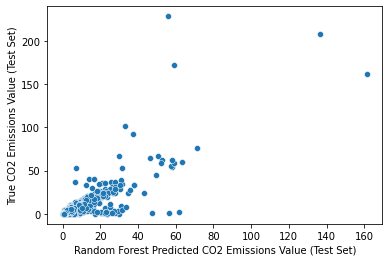

In [184]:
fig, ax = plt.subplots()
plt.ylabel('True CO2 Emissions Value (Test Set)')
plt.xlabel('Random Forest Predicted CO2 Emissions Value (Test Set)')
sns.scatterplot(x = regressor.predict(X_test), y = y_test);